![](Images/2022-12-06-17-47-16.png)

# degree of node it the number of nodes connected with this node
## We want to connect the points without any loops
* U_i_j    = the connection between point i and point j is a binary variable exist or not
* D_i_j    = the Distance between point i and point j  => obtaining it from point locations
* flow_i_j = The demand between point i and point j    =>
* G_i      = Generation (Production)of node i          => assume any thing
* L_i      = attraction of node i                      => assume andy thing
* M        = Number of points
* c = j
* N degree = number of connected nodes



In [1]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
# initialize the model
model = pyo.AbstractModel()

# # initialize the parameters and the variables
model.M = pyo.Param(mutable=True, default=8)
model.N = pyo.Param(mutable=True, default=2)
model.I = pyo.RangeSet(1, model.M)
model.J = pyo.Set(initialize=model.I)

## Initiate points randomly
def initval(model, i):
    return random.uniform(0.001,1)
model.x_loc = pyo.Param(model.I, within=pyo.NonNegativeReals, initialize=initval, mutable=True)
model.y_loc = pyo.Param(model.I, within=pyo.NonNegativeReals, initialize=initval, mutable=True)

def dis_rule(model, i, j):
    return pyo.sqrt((model.x_loc[i] - model.x_loc[j])**2 + (model.y_loc[i] - model.y_loc[j])**2)
model.D = pyo.Param(model.I, model.J, within=pyo.NonNegativeReals, initialize=dis_rule, mutable=True)

model.U = pyo.Var(model.I, model.J, within=pyo.Binary, initialize=1)
model.flow = pyo.Var(model.I, model.J, within=pyo.NonNegativeReals)
model.G = pyo.Var(bounds=(0, model.M), within=pyo.NonNegativeReals)


# # # Constraint Declarations
def con_1_rule(model, i):
    if i == 1:
        return model.G -0.1 ==sum(model.flow[i,j] - model.flow[j,i] if i!=j else 0 for j in model.J)
    else:
        return      0  -0.1 ==sum(model.flow[i,j] - model.flow[j,i]  if i!=j else 0 for j in model.J)
model.c1 = pyo.Constraint(model.I, rule = con_1_rule)

def con_2_rule(model, i, j):
    return model.flow[i,j] <= model.U[i,j]  *model.M   # flow = number of connected points equal the number of points or less
model.c2 = pyo.Constraint(model.I, model.J, rule=con_2_rule)

def con_3_rule(model, i):
    return sum(model.U[i,j] + model.U[i,j] for j in model.J)  == model.N  
model.c3 = pyo.Constraint(model.I, rule=con_3_rule)

def OF_rule(model):
    return np.sum(model.U[i,j] * model.D[i,j] for i in model.I for j in model.J)
model.OF = pyo.Objective(rule= OF_rule, sense=pyo.minimize)

# Define the solver
solver = pyo.SolverFactory('glpk')
instance = model.create_instance()
results = solver.solve(instance)

# write the results
results.write()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


C:\Users\20100\AppData\Local\Temp\ipykernel_8744\2342655509.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i,j] * model.D[i,j] for i in model.I for j in model.J)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1.94020803690551
  Upper bound: 1.94020803690551
  Number of objectives: 1
  Number of constraints: 81
  Number of variables: 130
  Number of nonzeros: 306
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1003
      Number of created subproblems: 1003
  Error rc: 0
  Time: 0.6280004978179932
# ----------------------------------------------------------
#   Solution Information
# -----

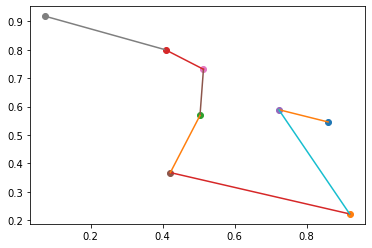

In [7]:
for i in instance.I:
    plt.scatter(pyo.value(instance.x_loc[i]), pyo.value(instance.y_loc[i]))
    plt.plot(pyo.value(instance.x_loc[i]), pyo.value(instance.y_loc[i]))
    for j in  instance.J:
        if i != j:
            if pyo.value(instance.U[i, j])== 1:
                plt.plot( [ pyo.value(instance.x_loc[i]), pyo.value(instance.x_loc[j]) ], [ pyo.value(instance.y_loc[i]), pyo.value(instance.y_loc[j]) ])


    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


C:\Users\20100\AppData\Local\Temp\ipykernel_8744\2342655509.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i,j] * model.D[i,j] for i in model.I for j in model.J)


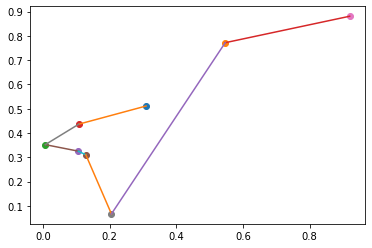

In [15]:
model.M = 8
model.N = 2
instance = model.create_instance()
results = solver.solve(instance)

for i in instance.I:
    plt.scatter(pyo.value(instance.x_loc[i]), pyo.value(instance.y_loc[i]))
    plt.plot(pyo.value(instance.x_loc[i]), pyo.value(instance.y_loc[i]))
    for j in  instance.J:
        if i != j:
            if pyo.value(instance.U[i, j])== 1:
                plt.plot( [ pyo.value(instance.x_loc[i]), pyo.value(instance.x_loc[j]) ], [ pyo.value(instance.y_loc[i]), pyo.value(instance.y_loc[j]) ])
